           Air-conditioner     TV
Year Month                       
2021 Apr             270.0  250.0
     Aug             270.0  250.0
     Dec             220.0  250.0
     Feb             270.0  250.0
     Jan             270.0  200.0
     Jul             220.0  250.0
     Jun             270.0  200.0
     Mar             270.0  150.0
     May             270.0  300.0
     Nov             320.0  250.0
     Oct             270.0  250.0
     Sep             170.0  250.0
2022 Apr             270.0  300.0
     Aug             320.0  250.0
     Dec             270.0  250.0
     Feb             270.0  300.0
     Jan             270.0  250.0
     Jul             270.0  250.0
     Jun             270.0  250.0
     Mar             270.0  200.0
     May             270.0  350.0
     Nov             370.0  250.0
     Oct             320.0  250.0
     Sep             220.0  250.0
2023 Jan             200.0  270.0
     Feb             250.0  270.0
     Mar             150.0  270.0
     Apr      

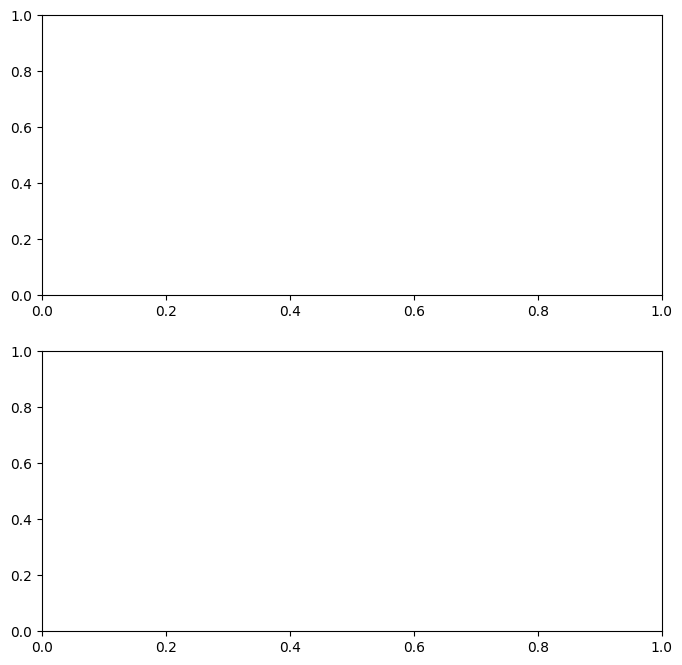

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# create a dataframe with the sales data for TVs and air-conditioners for 2021 and 2022
sales_data = {'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']*2,
              'Year': [2021]*12 + [2022]*12,
              'Product': ['TV']*6 + ['Air-conditioner']*6 + ['TV']*6 + ['Air-conditioner']*6,
              'Sales': [200, 250, 150, 250, 300, 200, 220, 270, 170, 270, 320, 220] + 
                      [250, 300, 200, 300, 350, 250, 270, 320, 220, 320, 370, 270]}
df_sales = pd.DataFrame(sales_data)

# pivot the dataframe to create separate columns for TV and air-conditioner sales
df_sales = df_sales.pivot(index=['Year', 'Month'], columns='Product', values='Sales')

# fill missing values with the mean sales for each product
df_sales = df_sales.fillna(df_sales.mean())

# create a linear regression model for each product
model_tv = LinearRegression()
model_aircon = LinearRegression()

# fit the models to the sales data for 2021 and 2022
X_train = pd.DataFrame({'TV': df_sales.loc[(2021, ), 'TV'], 
                        'Air-conditioner': df_sales.loc[(2021, ), 'Air-conditioner']})
y_train = pd.DataFrame({'TV': df_sales.loc[(2021, ), 'Air-conditioner'], 
                        'Air-conditioner': df_sales.loc[(2021, ), 'TV']})
model_tv.fit(X_train, y_train['TV'])
model_aircon.fit(X_train, y_train['Air-conditioner'])

# create a dataframe with the months for 2023
months_2023 = pd.MultiIndex.from_product([pd.Series([2023]), pd.Series(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])], names=['Year', 'Month'])
df_2023 = pd.DataFrame(index=months_2023, columns=['TV', 'Air-conditioner'])

# predict sales for each month of 2023 using the fitted models
for month in months_2023:
    X_test = pd.DataFrame({'TV': df_sales.loc[(month[0]-2, month[1]), 'TV'], 
                           'Air-conditioner': df_sales.loc[(month[0]-2, month[1]), 'Air-conditioner']}, index=[0])
    sales_tv_2023 = model_tv.predict(X_test)[0]
    sales_aircon_2023 = model_aircon.predict(X_test)[0]
    df_2023.loc[month, 'TV'] = sales_tv_2023
    df_2023.loc[month, 'Air-conditioner'] = sales_aircon_2023
    
# combine the sales data and predictions into one dataframe
df_sales_all = pd.concat([df_sales, df_2023])

print(df_sales_all)

# plot the sales data and predictions for TVs and air conditioners
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# plot the sales data for TVs
ax = df_sales_all
